In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm as tqdm
import uproot3

In [2]:
mini = uproot3.open("rootuple_2018_UpsPiPi_covMatrix_v3.root")['rootuple;1']['CandidateTree;1']

In [3]:
len(mini)

572519

In [4]:
data = mini.arrays()

In [5]:
baseline = (data[b'candidate_vProb'] > 0.05)
eigenMinusAND = baseline & (data[b'track1_eigenValues']<0) & (data[b'track2_eigenValues']<0)
eigenMinusOR = baseline & ((data[b'track1_eigenValues']<0) | (data[b'track2_eigenValues']<0))

In [6]:
ypipi_full = data[b'candidate_vMass'][baseline]
ypipi_full_eigenMinusAND = data[b'candidate_vMass'][eigenMinusAND]
ypipi_full_eigenMinusOR = data[b'candidate_vMass'][eigenMinusOR]

a = len(ypipi_full)
b = len(ypipi_full_eigenMinusOR)
c = len(ypipi_full_eigenMinusAND)

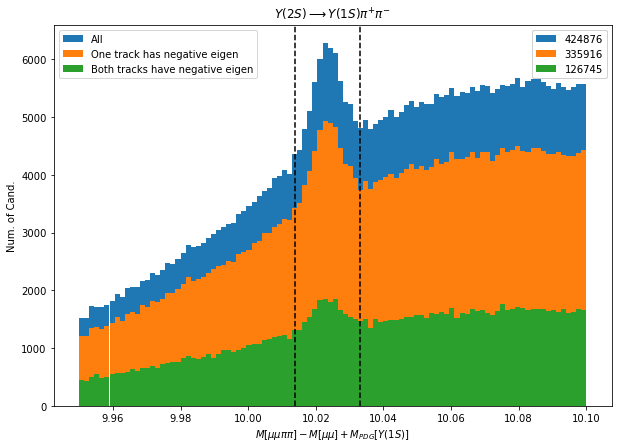

In [7]:
plt.figure(figsize=(10,7))
plt.hist(ypipi_full.flatten(),range=(9.95,10.1),bins=100,log=False,label="All")
plt.hist(ypipi_full_eigenMinusOR.flatten(),range=(9.95,10.1),bins=100,log=False,label="One track has negative eigen")
plt.hist(ypipi_full_eigenMinusAND.flatten(),range=(9.95,10.1),bins=100,log=False,label="Both tracks have negative eigen")
plt.title("$Y(2S) \longrightarrow Y(1S)\pi^{+}\pi^{-}$")
plt.xlabel('$M[\mu\mu\pi\pi] - M[\mu\mu] + M_{PDG}[Y(1S)]$')
plt.ylabel('Num. of Cand.')
legend1 = plt.legend(loc=2)
legend2 = plt.legend([a, b, c],loc=1)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.axvline(x=10.014, color='black', linestyle='--')
plt.axvline(x=10.033, color='black', linestyle='--')

In [8]:
eigenMinusAND_ = (data[b'track1_eigenValues']<0) & (data[b'track2_eigenValues']<0)
eigenMinusOR_ = ((data[b'track1_eigenValues']<0) | (data[b'track2_eigenValues']<0))

In [9]:
Prob_full = data[b'candidate_vProb']
Prob_full_eigenMinusAND = data[b'candidate_vProb'][eigenMinusAND_]
Prob_full_eigenMinusOR = data[b'candidate_vProb'][eigenMinusOR_]

n1 = len(Prob_full)
n2 = len(Prob_full_eigenMinusOR)
n3 = len(Prob_full_eigenMinusAND)

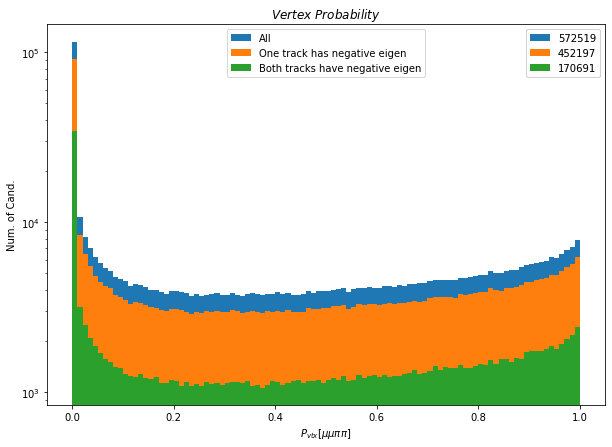

In [10]:
plt.figure(figsize=(10,7))
plt.hist(Prob_full.flatten(),range=(0,1),bins=100,log=True,label="All")
plt.hist(Prob_full_eigenMinusOR.flatten(),range=(0,1),bins=100,log=True,label="One track has negative eigen")
plt.hist(Prob_full_eigenMinusAND.flatten(),range=(0,1),bins=100,log=True,label="Both tracks have negative eigen")
plt.title("$Vertex\ Probability$")
plt.xlabel('$P_{vtx}[\mu\mu\pi\pi]$')
plt.ylabel('Num. of Cand.')
legend1 = plt.legend(loc=9)
legend2 = plt.legend([n1, n2, n3],loc=1)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

In [11]:
Chi2_full = data[b'candidate_vChi2']
Chi2_full_eigenMinusAND = data[b'candidate_vChi2'][eigenMinusAND_]
Chi2_full_eigenMinusOR = data[b'candidate_vChi2'][eigenMinusOR_]

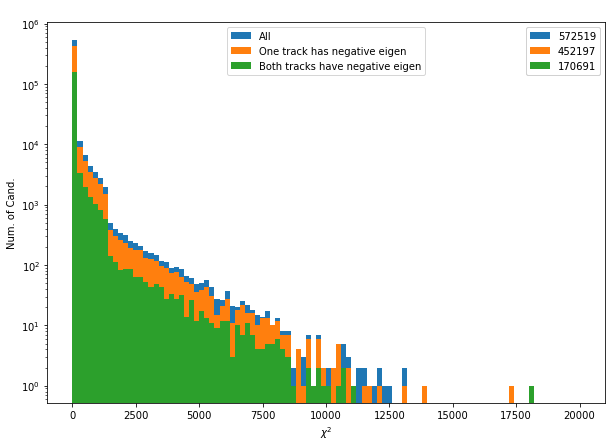

In [12]:
plt.figure(figsize=(10,7))
plt.hist(Chi2_full.flatten(),range=(0,20000),bins=100,log=True,label="All")
plt.hist(Chi2_full_eigenMinusOR.flatten(),range=(0,20000),bins=100,log=True,label="One track has negative eigen")
plt.hist(Chi2_full_eigenMinusAND.flatten(),range=(0,20000),bins=100,log=True,label="Both tracks have negative eigen")
plt.title(" ")
plt.xlabel('$\chi^{2}$')
plt.ylabel('Num. of Cand.')
legend1 = plt.legend(loc=9)
legend2 = plt.legend([n1, n2, n3],loc=1)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

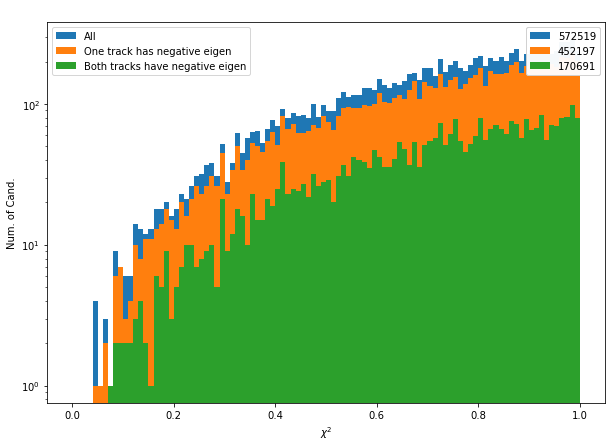

In [14]:
plt.figure(figsize=(10,7))
plt.hist(Chi2_full.flatten(),range=(0,1),bins=100,log=True,label="All")
plt.hist(Chi2_full_eigenMinusOR.flatten(),range=(0,1),bins=100,log=True,label="One track has negative eigen")
plt.hist(Chi2_full_eigenMinusAND.flatten(),range=(0,1),bins=100,log=True,label="Both tracks have negative eigen")
plt.title(" ")
plt.xlabel('$\chi^{2}$')
plt.ylabel('Num. of Cand.')
legend1 = plt.legend(loc=2)
legend2 = plt.legend([n1, n2, n3],loc=1)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)